In [7]:
import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [14]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3217,ham,Don know:)this week i'm going to tirunelvai da.,NaN,NaN,NaN
3906,ham,No that just means you have a fat head,NaN,NaN,NaN
1514,ham,K:)all the best:)congrats...,NaN,NaN,NaN
4130,ham,\Its Ur luck to Love someone. Its Ur fortune t...,its a miracle to Love a person who can't Love...,NaN,NaN
4916,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN


In [15]:
df.shape

(5572, 5)

In [ ]:
#1. Data Cleaning 
# 2. EDA
# 3. text prePorcessing
# 4. Model building
# 5. Evaluation
# 6. IMprovement
# 7. Website
# 8. Deploy

# 1 Data cleaning : 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [20]:
# drop the last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [19]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4573,ham,:( but your not here....,NaN,NaN,NaN
905,ham,Hey what's up charles sorry about the late reply.,NaN,NaN,NaN
985,ham,Carlos says he'll be at mu in &lt;#&gt; minutes,NaN,NaN,NaN
3991,ham,"Dizzamn, aight I'll ask my suitemates when I g...",NaN,NaN,NaN
1512,ham,"Hey sweet, I was wondering when you had a mome...",NaN,NaN,NaN


In [21]:
# renaming the cols..

df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
1134,ham,U wake up already? Thanx 4 e tau sar piah it's...
583,ham,my ex-wife was not able to have kids. Do you w...
661,ham,Then mum's repent how?
4421,ham,MMM ... Fuck .... Merry Christmas to me
3851,ham,"No, its true..k,Do u knw dis no. &lt;#&gt; ?"


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder ()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

NameError: name 'encoder' is not defined

In [28]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
# missing values..

df.isnull().sum() 

target    0
text      0
dtype: int64

In [30]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [ ]:
# remove duplicates..
df = df.drop_duplicates(keep='first')

In [32]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.shape

(5169, 2)

# 2. EDA

In [35]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

In [48]:
pip install matplotlib

  Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.5-cp313-cp313-macosx_10_13_universal2.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.3.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 3.6 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.6 MB/s eta 0:00:00a 0:00:01
Using c

In [57]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


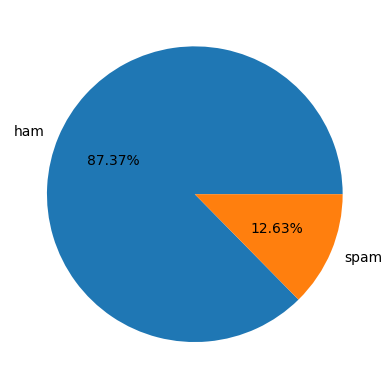

In [ ]:
import matplotlib.pyplot as plt

# Get value counts and labels dynamically
counts = df['target'].value_counts()
labels = counts.index.tolist()

# Plot pie chart()
plt.pie(counts, labels=labels, autopct="%0.2f%%")

plt.show()

In [62]:
pip install nltk 

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.5 MB/s eta 0:00:00a 0:00:01
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [nltk]4/5 [nltk]b]
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# data is imbalanced...

import nltk


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nitishkumar/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [64]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nitishkumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [67]:
df['num_characters'] = df['text'].apply(len)

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_82180/253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [68]:
df.head()

,target,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [89]:
!pip install nltk

In [92]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nitishkumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nitishkumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [110]:
import nltk
from nltk.tokenize import word_tokenize

In [111]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nitishkumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [113]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Required only once

df['word_count'] = df['text'].apply(lambda x: len(word_tokenize(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nitishkumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/nitishkumar/nltk_data'
    - '/Users/nitishkumar/Documents/GitHub/Machine-Learning-projects/.venv/nltk_data'
    - '/Users/nitishkumar/Documents/GitHub/Machine-Learning-projects/.venv/share/nltk_data'
    - '/Users/nitishkumar/Documents/GitHub/Machine-Learning-projects/.venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:

df['nums_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/nitishkumar/nltk_data'
    - '/Users/nitishkumar/Documents/GitHub/Machine-Learning-projects/.venv/nltk_data'
    - '/Users/nitishkumar/Documents/GitHub/Machine-Learning-projects/.venv/share/nltk_data'
    - '/Users/nitishkumar/Documents/GitHub/Machine-Learning-projects/.venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [97]:
df.head()

,target,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [99]:
df

,target,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [102]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nitishkumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize

df['num_sentences'] = df['text'].apply(lambda x: len(sent_tokenize(x)))


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nitishkumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/nitishkumar/nltk_data'
    - '/Users/nitishkumar/Documents/GitHub/Machine-Learning-projects/.venv/nltk_data'
    - '/Users/nitishkumar/Documents/GitHub/Machine-Learning-projects/.venv/share/nltk_data'
    - '/Users/nitishkumar/Documents/GitHub/Machine-Learning-projects/.venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [104]:
df.head()

,target,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# num of words

df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [ ]:
import nltk

from nltk.tokenize import word_tokenize

nltk.download('punkt')

df['word_count'] = df['text'].apply(lambda x: len(word_tokenize(x)))


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nitishkumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/nitishkumar/nltk_data'
    - '/Users/nitishkumar/Documents/GitHub/Machine-Learning-projects/.venv/nltk_data'
    - '/Users/nitishkumar/Documents/GitHub/Machine-Learning-projects/.venv/share/nltk_data'
    - '/Users/nitishkumar/Documents/GitHub/Machine-Learning-projects/.venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import nltk

from nltk.tokenize import word_tokenize

nltk.download('punkt')

df['word_count'] = df['text'].apply(lambda x : len(word_tokenize(x)))



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nitishkumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/nitishkumar/nltk_data'
    - '/Users/nitishkumar/Documents/GitHub/Machine-Learning-projects/.venv/nltk_data'
    - '/Users/nitishkumar/Documents/GitHub/Machine-Learning-projects/.venv/share/nltk_data'
    - '/Users/nitishkumar/Documents/GitHub/Machine-Learning-projects/.venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import nltk

from nltk.tokenize import word_tokenize

nltk.download('punkt')

df['word_count'] = df['text'].apply(lambda x: len(word_tokenize(x)))

